# K-Means TODO
* Graphical comparison of predicted and actual clustering (user markers for actual; colors for predicted - have to use matplotlib, not seaborn to do this)
* Accuracy of clustering 2 overlapping Iris species


In [191]:
#----------
# Explore K-Means on Iris data
#----------

# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import sklearn
from sklearn import datasets as d
from sklearn.cluster import k_means

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

print 'sklearn version = {}'.format(sklearn.__version__)


sklearn version = 0.18


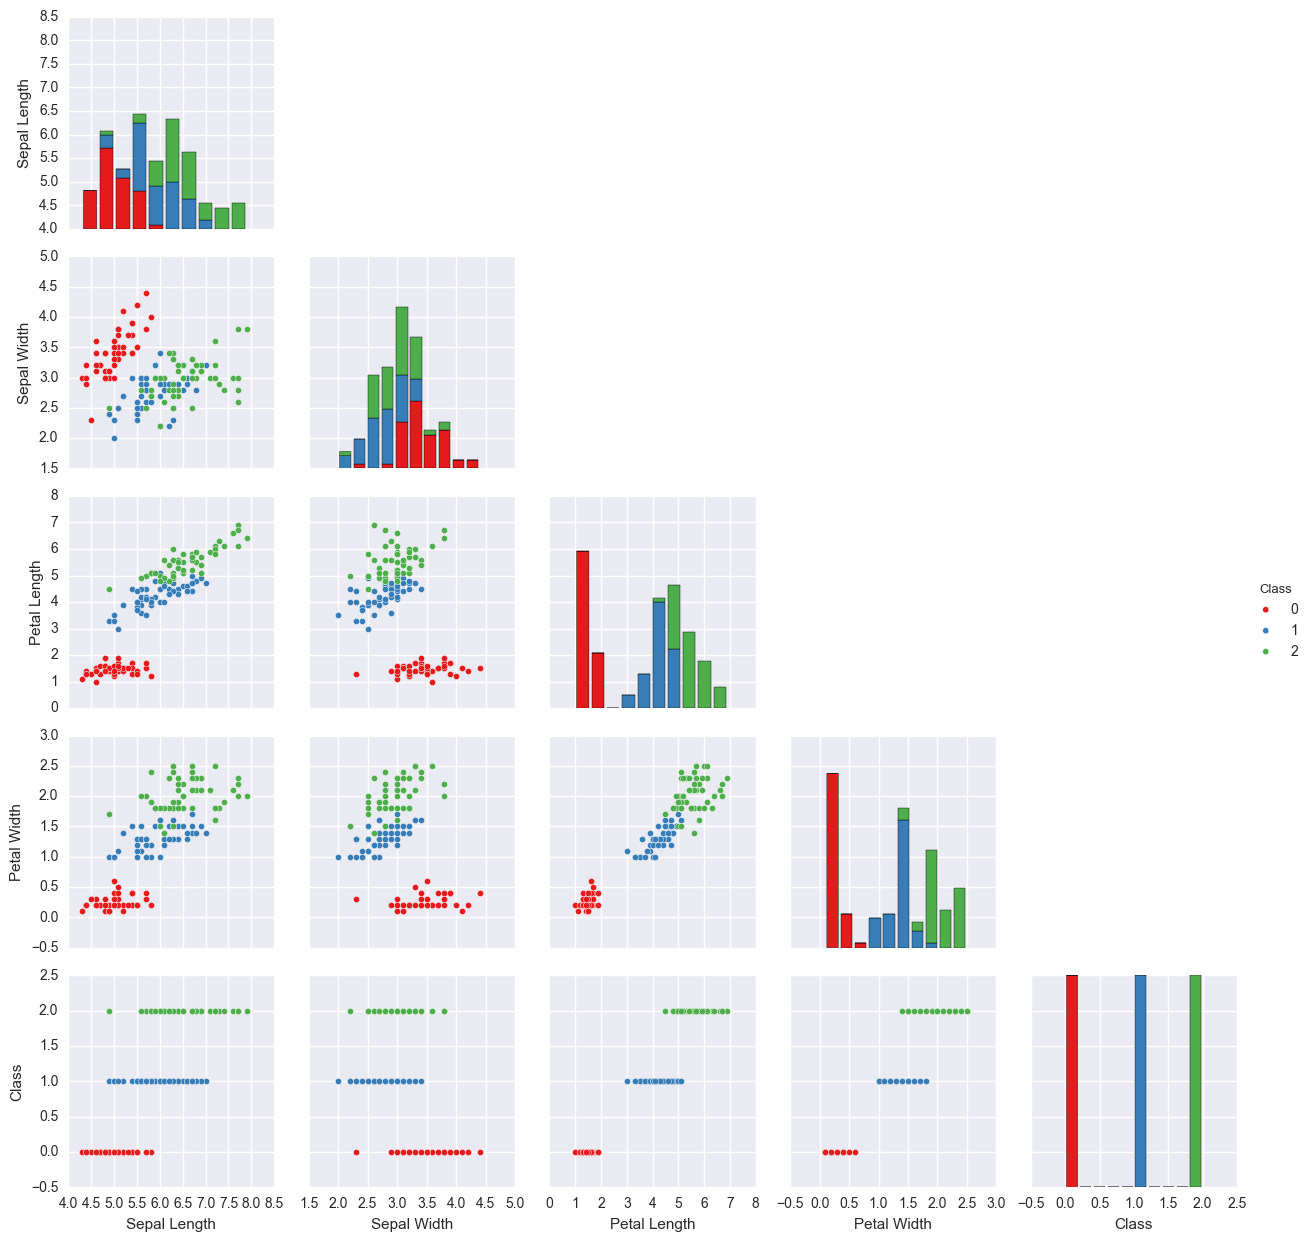

In [185]:
#----------

iris = d.load_iris()
X, y = iris.data, iris.target

dfx = pd.DataFrame(X)

df = pd.concat([dfx, pd.DataFrame(y)], axis=1)
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

g = sns.pairplot(df, hue='Class', palette='Set1')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i,j].set_visible(False)


array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

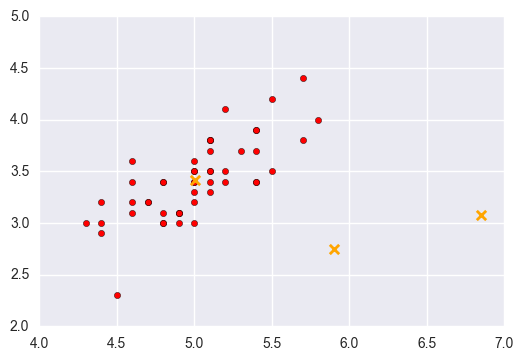

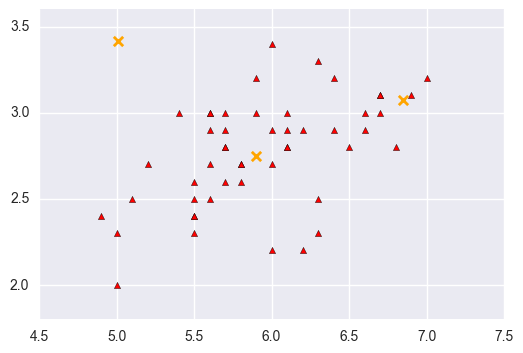

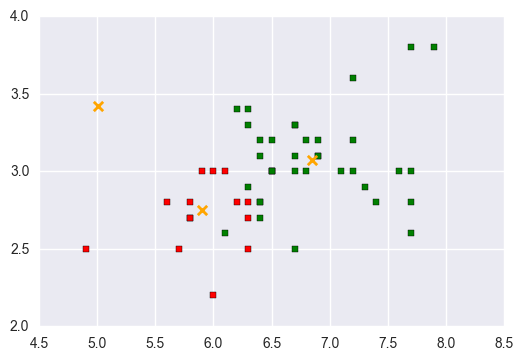

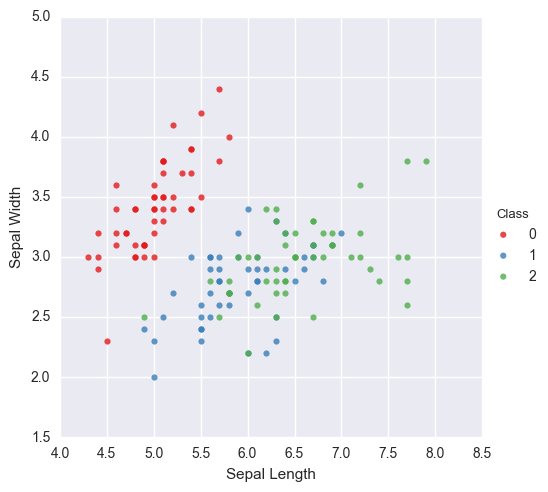

In [194]:
#----------

centroids, labels, inertia = k_means(X, n_clusters=3)
centroids
labels

results = pd.concat([df, pd.DataFrame(labels)], axis=1)
results = results.rename(columns = {0:'Pred_Class'})

true_classes = [0, 1, 2]
markers = ['o', '^', 's']

fig, ax = plt.subplots()

# for cls, m in zip(true_classes, markers):
match1 = results[(results.Class == 0) & (results.Pred_Class == 0)].as_matrix()
mismatch1 = results[(results.Class == 0) & (results.Pred_Class != 0)].as_matrix()
ax.scatter(match1[:,0], match1[:,1], c='green', marker='o')
ax.scatter(mismatch1[:,0], mismatch1[:,1], c='red', marker='o')
ax.scatter(centroids[:,0], centroids[:,1], marker='x', linewidths=2, s=45, c='orange')

fig, ax = plt.subplots()
match2 = results[(results.Class == 1) & (results.Pred_Class == 1)].as_matrix()
mismatch2 = results[(results.Class == 1) & (results.Pred_Class != 1)].as_matrix()
ax.scatter(match2[:,0], match2[:,1], c='green', marker='^')
ax.scatter(mismatch2[:,0], mismatch2[:,1], c='red', marker='^')
ax.scatter(centroids[:,0], centroids[:,1], marker='x', linewidths=2, s=45, c='orange')

fig, ax = plt.subplots()
match3 = results[(results.Class == 2) & (results.Pred_Class == 2)].as_matrix()
mismatch3 = results[(results.Class == 2) & (results.Pred_Class != 2)].as_matrix()
ax.scatter(match3[:,0], match3[:,1], c='green', marker='s', s=25)
ax.scatter(mismatch3[:,0], mismatch3[:,1], c='red', marker='s', s=25)

ax.scatter(centroids[:,0], centroids[:,1], marker='x', linewidths=2, s=45, c='orange')


sns.lmplot('Sepal Length', 'Sepal Width', data=df, hue='Class', palette='Set1', fit_reg=False)